# Noosa Yogurt Brand Analysis

## Read Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df0 = pd.read_csv("NoosaYogurt.csv")

In [3]:
df0.head()

,Service Begin Date,Service End Date,UCB Client Name,UCB Client ZIP Code (Loops Company Record ZIP Code),Vendor,Vendor Description/Material,Invoice #,Material or Addt. Fee,WATER Material Name or Addt. Fee Name,By Pull (0 or 1),By Weight (0 or 1),By Item (0 or 1),Weight,Weight Metric,Material Cost(US $),Material Revenue (US $),Additional Fee Cost,Additional Fee Occurencies,Additional Fee Total
0,3/1/19,3/31/19,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Cardboard,0,1,0,5.74,Tons,,200.99,NaN,NaN,NaN
1,3/1/19,3/31/19,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Cardboard,0,1,0,4.92,Tons,,172.2,NaN,NaN,NaN
2,3/1/19,3/31/19,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Plastic - Film LDPE Clear,0,1,0,0.48,Tons,,40.53,NaN,NaN,NaN
3,3/1/19,3/31/19,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Plastic - Polypropylene Containers,0,1,0,450,Pounds,,15.75,NaN,NaN,NaN
4,3/1/19,3/31/19,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Paper Board,0,1,0,295,Pounds,14.75,NaN,NaN,NaN,NaN


## Data Preprocessing

In [4]:
# deal with date columns
df0 = df0.drop(['Service End Date'], axis=1)
df0.insert (0, "Date", pd.to_datetime(df0["Service Begin Date"]))  

In [5]:
df0['Date'] = df0['Date'].apply(lambda x: x.strftime('%Y-%m'))
# df0["Service Begin Date"].value_counts()
df0 = df0.drop(['Service Begin Date'], axis=1)
df0.head()

,Date,UCB Client Name,UCB Client ZIP Code (Loops Company Record ZIP Code),Vendor,Vendor Description/Material,Invoice #,Material or Addt. Fee,WATER Material Name or Addt. Fee Name,By Pull (0 or 1),By Weight (0 or 1),By Item (0 or 1),Weight,Weight Metric,Material Cost(US $),Material Revenue (US $),Additional Fee Cost,Additional Fee Occurencies,Additional Fee Total
0,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Cardboard,0,1,0,5.74,Tons,,200.99,NaN,NaN,NaN
1,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Cardboard,0,1,0,4.92,Tons,,172.2,NaN,NaN,NaN
2,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Plastic - Film LDPE Clear,0,1,0,0.48,Tons,,40.53,NaN,NaN,NaN
3,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Plastic - Polypropylene Containers,0,1,0,450,Pounds,,15.75,NaN,NaN,NaN
4,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Paper Board,0,1,0,295,Pounds,14.75,NaN,NaN,NaN,NaN


In [6]:
df0['Date'].value_counts().sort_index()

2019-01    34
2019-02    14
2019-03    25
2019-04    26
2019-05    18
2019-06    35
2019-07    17
2019-08    30
2019-09    27
2019-10    30
2019-11    24
2019-12    34
2020-01    36
2020-02    43
2020-03    27
2020-04    32
2020-05    37
2020-06    33
2020-07     2
Name: Date, dtype: int64

In [7]:
# deal with by pull/weight/item
df0['By Pull (0 or 1)'] = df0['By Pull (0 or 1)'].str.strip().replace('', np.nan)
df0['By Pull (0 or 1)'].value_counts()

0    274
1     98
Name: By Pull (0 or 1), dtype: int64

In [8]:
df0['By Item (0 or 1)'] = df0['By Item (0 or 1)'].str.strip().replace('', np.nan)
df0['By Item (0 or 1)'].value_counts()
df0['By Weight (0 or 1)'] = df0['By Weight (0 or 1)'].str.strip().replace('', np.nan)
df0['By Weight (0 or 1)'].value_counts()

1    267
0    105
Name: By Weight (0 or 1), dtype: int64

In [9]:
df0['By Item (0 or 1)'] = df0['By Item (0 or 1)'].astype(float)
df0['By Weight (0 or 1)'] = df0['By Weight (0 or 1)'].astype(float)
df0['By Pull (0 or 1)'] = df0['By Pull (0 or 1)'].astype(float)

In [10]:
# add total amount 
df0.head()

,Date,UCB Client Name,UCB Client ZIP Code (Loops Company Record ZIP Code),Vendor,Vendor Description/Material,Invoice #,Material or Addt. Fee,WATER Material Name or Addt. Fee Name,By Pull (0 or 1),By Weight (0 or 1),By Item (0 or 1),Weight,Weight Metric,Material Cost(US $),Material Revenue (US $),Additional Fee Cost,Additional Fee Occurencies,Additional Fee Total
0,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Cardboard,0.0,1.0,0.0,5.74,Tons,,200.99,NaN,NaN,NaN
1,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Cardboard,0.0,1.0,0.0,4.92,Tons,,172.2,NaN,NaN,NaN
2,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Plastic - Film LDPE Clear,0.0,1.0,0.0,0.48,Tons,,40.53,NaN,NaN,NaN
3,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Plastic - Polypropylene Containers,0.0,1.0,0.0,450,Pounds,,15.75,NaN,NaN,NaN
4,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Paper Board,0.0,1.0,0.0,295,Pounds,14.75,NaN,NaN,NaN,NaN


In [11]:
df0['Weight'] = df0['Weight'].str.replace(',','')

In [12]:
df0['Weight'] = df0['Weight'].str.strip().replace('', np.nan).astype(float)
df0['Weight']

0          5.74
1          4.92
2          0.48
3        450.00
4        295.00
         ...   
519    24840.00
520    25000.00
521        1.47
522         NaN
523         NaN
Name: Weight, Length: 524, dtype: float64

In [13]:
df0['Material Cost(US $)'] = df0['Material Cost(US $)'].str.strip().replace('', np.nan).astype(float)
df0['Material Cost(US $)']

0          NaN
1          NaN
2          NaN
3          NaN
4        14.75
        ...   
519    1980.00
520    2000.00
521      36.75
522        NaN
523        NaN
Name: Material Cost(US $), Length: 524, dtype: float64

In [14]:
df0['Material Revenue (US $)'] = df0['Material Revenue (US $)'].str.strip().replace('', np.nan).astype(float)
df0['Material Revenue (US $)']

0      200.99
1      172.20
2       40.53
3       15.75
4         NaN
        ...  
519       NaN
520       NaN
521       NaN
522       NaN
523       NaN
Name: Material Revenue (US $), Length: 524, dtype: float64

In [15]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 18 columns):
Date                                                   524 non-null object
UCB Client Name                                        524 non-null object
UCB Client ZIP Code (Loops Company Record ZIP Code)    524 non-null int64
Vendor                                                 524 non-null object
Vendor Description/Material                            524 non-null object
Invoice #                                              524 non-null object
Material or Addt. Fee                                  524 non-null object
WATER Material Name or Addt. Fee Name                  470 non-null object
By Pull (0 or 1)                                       372 non-null float64
By Weight (0 or 1)                                     372 non-null float64
By Item (0 or 1)                                       372 non-null float64
Weight                                                 372 non-null 

In [16]:
df0['Additional Fee Cost'] = df0['Additional Fee Cost'].astype(float)
df0['Additional Fee Cost'].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
519      0.0
520      0.0
521      0.0
522     10.5
523    460.0
Name: Additional Fee Cost, Length: 524, dtype: float64

In [17]:
df0['Additional Fee Occurencies'] = df0['Additional Fee Occurencies'].str.strip().replace('', np.nan).astype(float)

In [18]:
df0['Additional Fee Total'] = df0['Additional Fee Total'].astype(float)

In [19]:
df0['Material Cost(US $)'] = df0['Material Cost(US $)'].fillna(0)
df0['Additional Fee Total'] = df0['Additional Fee Total'].fillna(0)

In [20]:
df0["Total Cost"] = df0["Material Cost(US $)"]+df0["Additional Fee Total"]
df0.head()

,Date,UCB Client Name,UCB Client ZIP Code (Loops Company Record ZIP Code),Vendor,Vendor Description/Material,Invoice #,Material or Addt. Fee,WATER Material Name or Addt. Fee Name,By Pull (0 or 1),By Weight (0 or 1),By Item (0 or 1),Weight,Weight Metric,Material Cost(US $),Material Revenue (US $),Additional Fee Cost,Additional Fee Occurencies,Additional Fee Total,Total Cost
0,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Cardboard,0.0,1.0,0.0,5.74,Tons,0.00,200.99,NaN,NaN,0.0,0.00
1,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Cardboard,0.0,1.0,0.0,4.92,Tons,0.00,172.20,NaN,NaN,0.0,0.00
2,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Plastic - Film LDPE Clear,0.0,1.0,0.0,0.48,Tons,0.00,40.53,NaN,NaN,0.0,0.00
3,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Plastic - Polypropylene Containers,0.0,1.0,0.0,450.00,Pounds,0.00,15.75,NaN,NaN,0.0,0.00
4,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Paper Board,0.0,1.0,0.0,295.00,Pounds,14.75,NaN,NaN,NaN,0.0,14.75


In [21]:
# deal with different weight units
df0['Weight Metric'].value_counts()

Pounds    245
          152
Tons      122
Name: Weight Metric, dtype: int64

In [22]:
df0.loc[df0["Weight Metric"]=="Pounds", "Weight"] /= 2000

In [23]:
df0.Weight

0       5.7400
1       4.9200
2       0.4800
3       0.2250
4       0.1475
        ...   
519    12.4200
520    12.5000
521     1.4700
522        NaN
523        NaN
Name: Weight, Length: 524, dtype: float64

In [24]:
df0.loc[df0["Weight Metric"]=="Pounds", "Weight Metric"] = "Tons"

In [25]:
df0["Weight Metric"].value_counts()

Tons    367
        152
Name: Weight Metric, dtype: int64

In [26]:
df0.head()

,Date,UCB Client Name,UCB Client ZIP Code (Loops Company Record ZIP Code),Vendor,Vendor Description/Material,Invoice #,Material or Addt. Fee,WATER Material Name or Addt. Fee Name,By Pull (0 or 1),By Weight (0 or 1),By Item (0 or 1),Weight,Weight Metric,Material Cost(US $),Material Revenue (US $),Additional Fee Cost,Additional Fee Occurencies,Additional Fee Total,Total Cost
0,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Cardboard,0.0,1.0,0.0,5.7400,Tons,0.00,200.99,NaN,NaN,0.0,0.00
1,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Cardboard,0.0,1.0,0.0,4.9200,Tons,0.00,172.20,NaN,NaN,0.0,0.00
2,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Plastic - Film LDPE Clear,0.0,1.0,0.0,0.4800,Tons,0.00,40.53,NaN,NaN,0.0,0.00
3,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Plastic - Polypropylene Containers,0.0,1.0,0.0,0.2250,Tons,0.00,15.75,NaN,NaN,0.0,0.00
4,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Paper Board,0.0,1.0,0.0,0.1475,Tons,14.75,NaN,NaN,NaN,0.0,14.75


In [27]:
df0.loc[df0['Material Cost(US $)'] != 0, 'Cost?'] = "Cost"

In [28]:
df0['Material Revenue (US $)'] = df0['Material Revenue (US $)'].fillna(0)
df0.loc[df0['Material Revenue (US $)'] != 0, 'Revenue?'] = "Revenue"

In [29]:
df0['Month'] = pd.to_datetime(df0['Date']).apply(lambda x: x.strftime('%m')).astype(int)

In [30]:
df0.head()

,Date,UCB Client Name,UCB Client ZIP Code (Loops Company Record ZIP Code),Vendor,Vendor Description/Material,Invoice #,Material or Addt. Fee,WATER Material Name or Addt. Fee Name,By Pull (0 or 1),By Weight (0 or 1),...,Weight Metric,Material Cost(US $),Material Revenue (US $),Additional Fee Cost,Additional Fee Occurencies,Additional Fee Total,Total Cost,Cost?,Revenue?,Month
0,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Cardboard,0.0,1.0,...,Tons,0.00,200.99,NaN,NaN,0.0,0.00,NaN,Revenue,3
1,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Cardboard,0.0,1.0,...,Tons,0.00,172.20,NaN,NaN,0.0,0.00,NaN,Revenue,3
2,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Plastic - Film LDPE Clear,0.0,1.0,...,Tons,0.00,40.53,NaN,NaN,0.0,0.00,NaN,Revenue,3
3,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Plastic - Polypropylene Containers,0.0,1.0,...,Tons,0.00,15.75,NaN,NaN,0.0,0.00,NaN,Revenue,3
4,2019-03,"Noosa Yoghurt - Bellvue, CO",80512,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,45232,Material,Paper - Paper Board,0.0,1.0,...,Tons,14.75,0.00,NaN,NaN,0.0,14.75,Cost,NaN,3


## Use XGBoost to do the prediction

In [31]:
df0 = df0.drop(['UCB Client Name','UCB Client ZIP Code (Loops Company Record ZIP Code)',
                'Invoice #','Weight Metric'],axis=1)

In [32]:
df0.head()

,Date,Vendor,Vendor Description/Material,Material or Addt. Fee,WATER Material Name or Addt. Fee Name,By Pull (0 or 1),By Weight (0 or 1),By Item (0 or 1),Weight,Material Cost(US $),Material Revenue (US $),Additional Fee Cost,Additional Fee Occurencies,Additional Fee Total,Total Cost,Cost?,Revenue?,Month
0,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,Paper - Cardboard,0.0,1.0,0.0,5.7400,0.00,200.99,NaN,NaN,0.0,0.00,NaN,Revenue,3
1,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,Paper - Cardboard,0.0,1.0,0.0,4.9200,0.00,172.20,NaN,NaN,0.0,0.00,NaN,Revenue,3
2,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,Plastic - Film LDPE Clear,0.0,1.0,0.0,0.4800,0.00,40.53,NaN,NaN,0.0,0.00,NaN,Revenue,3
3,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,Plastic - Polypropylene Containers,0.0,1.0,0.0,0.2250,0.00,15.75,NaN,NaN,0.0,0.00,NaN,Revenue,3
4,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,Paper - Paper Board,0.0,1.0,0.0,0.1475,14.75,0.00,NaN,NaN,0.0,14.75,Cost,NaN,3


In [33]:
# delete UCBZeroWaste vendors
# df0["Vendor"].value_counts()
df0 = df0[df0.Vendor != 'UCBZeroWaste - Los Angeles, California 90034']
df0["Vendor"].value_counts()

Waste-Not Recycling - Johnstown, Colorado 80534                    257
Gallegos Sanitation Incorporated - Fort Collins, Colorado 80522    175
A1 Organics - Eaton, Colorado 80615                                 80
Name: Vendor, dtype: int64

In [34]:
df_revenue = df0.loc[~df0['Revenue?'].isna()]

In [35]:
df_cost = df0.loc[~df0['Cost?'].isna()]

In [36]:
df_add = df0.loc[df0['Cost?'].isna() & df0['Revenue?'].isna()]

### predict revenues

In [37]:
df_revenue.head()

,Date,Vendor,Vendor Description/Material,Material or Addt. Fee,WATER Material Name or Addt. Fee Name,By Pull (0 or 1),By Weight (0 or 1),By Item (0 or 1),Weight,Material Cost(US $),Material Revenue (US $),Additional Fee Cost,Additional Fee Occurencies,Additional Fee Total,Total Cost,Cost?,Revenue?,Month
0,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,Paper - Cardboard,0.0,1.0,0.0,5.7400,0.0,200.99,NaN,NaN,0.0,0.0,NaN,Revenue,3
1,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,Paper - Cardboard,0.0,1.0,0.0,4.9200,0.0,172.20,NaN,NaN,0.0,0.0,NaN,Revenue,3
2,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,Plastic - Film LDPE Clear,0.0,1.0,0.0,0.4800,0.0,40.53,NaN,NaN,0.0,0.0,NaN,Revenue,3
3,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,Plastic - Polypropylene Containers,0.0,1.0,0.0,0.2250,0.0,15.75,NaN,NaN,0.0,0.0,NaN,Revenue,3
8,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,Plastic - Polypropylene Containers,0.0,1.0,0.0,0.1575,0.0,11.03,NaN,NaN,0.0,0.0,NaN,Revenue,3


In [38]:
# encode Vendor, Vendor Description/Material, Material or Addt. Fee, WATER Material Name or Addt. Fee Name

In [39]:
df_revenue["WATER Material Name or Addt. Fee Name"].value_counts()

Paper - Cardboard                        30
Plastic - Film LDPE Clear                30
Plastic - Polypropylene Containers       28
Plastic - Polypropylene Lids             22
Aluminum Cans - Loose                     2
Plastic - HDPE Containers                 2
Wire #2 Copper Insulated                  1
Escarp Monitors Flat Panel (LED/Pla)      1
Steel                                     1
Scrap Metal - Ferrous                     1
Name: WATER Material Name or Addt. Fee Name, dtype: int64

In [40]:
df_revenue = pd.get_dummies(df_revenue,columns = ['WATER Material Name or Addt. Fee Name'],drop_first = True)

In [41]:
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 507
Data columns (total 26 columns):
Date                                                                           118 non-null object
Vendor                                                                         118 non-null object
Vendor Description/Material                                                    118 non-null object
Material or Addt. Fee                                                          118 non-null object
By Pull (0 or 1)                                                               118 non-null float64
By Weight (0 or 1)                                                             118 non-null float64
By Item (0 or 1)                                                               118 non-null float64
Weight                                                                         118 non-null float64
Material Cost(US $)                                                            118 non-null float64

In [42]:
df_revenue.columns = ["Date","Vendor","Description","Material or Add","By Pull","By Weight","By Item","Weight","Material Cost","Material Revenue",
                     "Additional Fee Cost","Additional Fee Occur","Additional Fee Total","Total Cost","Cost?","Revenue?","Month",
                     "Material_Escarp","Material_Paper","Material_Film","Material_PlasticHDPE","Material_PlasticPC","Material_PlasticPL",
                     "Material_Metal","Material_Steel","Material_Wire"]

In [43]:
df_revenue.head()

,Date,Vendor,Description,Material or Add,By Pull,By Weight,By Item,Weight,Material Cost,Material Revenue,...,Month,Material_Escarp,Material_Paper,Material_Film,Material_PlasticHDPE,Material_PlasticPC,Material_PlasticPL,Material_Metal,Material_Steel,Material_Wire
0,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,0.0,1.0,0.0,5.7400,0.0,200.99,...,3,0,1,0,0,0,0,0,0,0
1,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,0.0,1.0,0.0,4.9200,0.0,172.20,...,3,0,1,0,0,0,0,0,0,0
2,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,0.0,1.0,0.0,0.4800,0.0,40.53,...,3,0,0,1,0,0,0,0,0,0
3,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,0.0,1.0,0.0,0.2250,0.0,15.75,...,3,0,0,0,0,1,0,0,0,0
8,2019-03,"Waste-Not Recycling - Johnstown, Colorado 80534",Recyclable Materials,Material,0.0,1.0,0.0,0.1575,0.0,11.03,...,3,0,0,0,0,1,0,0,0,0


In [44]:
# do XGBoost to predict Weight, Material Revenue
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection

In [45]:
df_revenue = df_revenue.drop(["Vendor","Description","Material or Add","Cost?","Revenue?",
                              "Additional Fee Cost","Additional Fee Occur"],axis=1)

In [46]:
df_revenue = df_revenue.drop(['By Pull','By Weight','By Item','Material Cost','Additional Fee Total','Total Cost'],axis=1)

In [47]:
X1 = df_revenue.drop(["Material Revenue"],axis=1)
y1 = df_revenue["Material Revenue"]
X2 = df_revenue.drop(["Weight","Material Revenue"],axis=1)
y2 = df_revenue["Weight"]
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y1, test_size=0.25)
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y2, test_size=0.25)

In [48]:
# model 1 is to predict Revenue, model2 is to predict weight
model1 = GradientBoostingRegressor()

In [49]:
X2_train_new = X2_train.drop(["Date"],axis=1)

In [50]:
X2_test_new = X2_test.drop(["Date"],axis=1)

In [51]:
# fit model 1
# model1.fit(X1_train, y1_train)
# y1_pred = model1.predict(X1_test)

In [52]:
from sklearn.metrics import mean_squared_error
# mean_squared_error(y1_test, y1_pred)

In [53]:
model2 = GradientBoostingRegressor(random_state=0)
model2.fit(X2_train_new, y2_train)
y2_pred = model2.predict(X2_test_new)
mean_squared_error(y2_test, y2_pred)

3.9149307458044125

In [54]:
# we can use model2 to predict weight

In [55]:
# draw a plot to see the accuracy/

In [56]:
X2_test["y test"] = y2_test
X2_test["y pred"] = y2_pred

/Users/chang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/chang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
df2 = X2_test[["Date","y test","y pred"]].groupby(['Date'],as_index=False).sum()

In [58]:
df2

,Date,y test,y pred
0,2019-01,0.2600,0.543705
1,2019-03,0.2250,0.159475
2,2019-05,3.2350,6.835673
3,2019-06,1.4400,0.873131
4,2019-07,1.4000,0.686741
5,2019-08,2.0250,1.524508
6,2019-09,0.0325,0.814468
7,2019-10,1.7300,3.905899
8,2019-12,3.8225,0.524739
9,2020-01,0.3800,0.543705


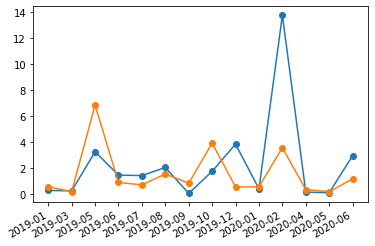

In [110]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.plot(df2['Date'], df2['y test'], 'o-')
ax.plot(df2['Date'], df2['y pred'], 'o-')

### So from the prediction, this model can be well used in predicting all the Material Revenue items' weight from Month and WATER Material Name

In [60]:
X2_train_new

,Month,Material_Escarp,Material_Paper,Material_Film,Material_PlasticHDPE,Material_PlasticPC,Material_PlasticPL,Material_Metal,Material_Steel,Material_Wire
41,6,0,0,1,0,0,0,0,0,0
495,6,0,1,0,0,0,0,0,0,0
284,1,0,0,0,0,1,0,0,0,0
18,4,0,0,1,0,0,0,0,0,0
89,7,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
494,6,0,0,0,0,0,0,0,1,0
139,9,0,0,1,0,0,0,0,0,0
461,5,0,0,1,0,0,0,0,0,0
378,2,0,1,0,0,0,0,0,0,0


In [61]:
d_0720_occ = {'Month': [7], 'Material_Escarp': [0],'Material_Paper':[1],'Material_Film':[0],'Material_PlasticHDPE':[0],
    'Material_PlasticPC':[0],'Material_PlasticPL':[0],'Material_Metal':[0],'Material_Steel':[0],'Material_Wire':[0]}
df_0720_occ = pd.DataFrame(data=d_0720_occ)

d_0720_esc = {'Month': [7], 'Material_Escarp': [1],'Material_Paper':[0],'Material_Film':[0],'Material_PlasticHDPE':[0],
    'Material_PlasticPC':[0],'Material_PlasticPL':[0],'Material_Metal':[0],'Material_Steel':[0],'Material_Wire':[0]}
df_0720_esc = pd.DataFrame(data=d_0720_esc)

d_0720_film = {'Month': [7], 'Material_Escarp': [0],'Material_Paper':[0],'Material_Film':[1],'Material_PlasticHDPE':[0],
    'Material_PlasticPC':[0],'Material_PlasticPL':[0],'Material_Metal':[0],'Material_Steel':[0],'Material_Wire':[0]}
df_0720_film = pd.DataFrame(data=d_0720_film)

d_0720_hdpe = {'Month': [7], 'Material_Escarp': [0],'Material_Paper':[0],'Material_Film':[0],'Material_PlasticHDPE':[1],
    'Material_PlasticPC':[0],'Material_PlasticPL':[0],'Material_Metal':[0],'Material_Steel':[0],'Material_Wire':[0]}
df_0720_hdpe = pd.DataFrame(data=d_0720_hdpe)

d_0720_pc = {'Month': [7], 'Material_Escarp': [0],'Material_Paper':[0],'Material_Film':[0],'Material_PlasticHDPE':[0],
    'Material_PlasticPC':[1],'Material_PlasticPL':[0],'Material_Metal':[0],'Material_Steel':[0],'Material_Wire':[0]}
df_0720_pc = pd.DataFrame(data=d_0720_pc)

d_0720_pl = {'Month': [7], 'Material_Escarp': [0],'Material_Paper':[0],'Material_Film':[0],'Material_PlasticHDPE':[0],
    'Material_PlasticPC':[0],'Material_PlasticPL':[1],'Material_Metal':[0],'Material_Steel':[0],'Material_Wire':[0]}
df_0720_pl = pd.DataFrame(data=d_0720_pl)

d_0720_metal = {'Month': [7], 'Material_Escarp': [0],'Material_Paper':[0],'Material_Film':[0],'Material_PlasticHDPE':[0],
    'Material_PlasticPC':[0],'Material_PlasticPL':[0],'Material_Metal':[1],'Material_Steel':[0],'Material_Wire':[0]}
df_0720_metal = pd.DataFrame(data=d_0720_metal)

d_0720_steel = {'Month': [7], 'Material_Escarp': [0],'Material_Paper':[0],'Material_Film':[0],'Material_PlasticHDPE':[0],
    'Material_PlasticPC':[0],'Material_PlasticPL':[0],'Material_Metal':[0],'Material_Steel':[1],'Material_Wire':[0]}
df_0720_steel = pd.DataFrame(data=d_0720_steel)

d_0720_wire = {'Month': [7], 'Material_Escarp': [0],'Material_Paper':[0],'Material_Film':[0],'Material_PlasticHDPE':[0],
    'Material_PlasticPC':[0],'Material_PlasticPL':[0],'Material_Metal':[0],'Material_Steel':[0],'Material_Wire':[1]}
df_0720_wire = pd.DataFrame(data=d_0720_wire)


In [62]:
weight_0720 = model2.predict(df_0720_occ)+model2.predict(df_0720_esc)+model2.predict(df_0720_film)+model2.predict(df_0720_hdpe)+model2.predict(df_0720_pc)+model2.predict(df_0720_pl)+model2.predict(df_0720_metal)+model2.predict(df_0720_steel)+model2.predict(df_0720_wire)
weight_0720

array([8.20545939])

### From the prediction, in July 2020, all the items that can generate Material Revenue will have weight of 11.043 approximately.

In [63]:
model2.predict(df_0720_occ)

array([6.94174134])

In [64]:
model2.predict(df_0720_esc)

array([0.08964582])

## Predict Cost

In [65]:
df_cost = df_cost.drop(["Material or Addt. Fee","Cost?","Revenue?",
                        "Additional Fee Cost","Additional Fee Occurencies",
                       "Material Revenue (US $)","Additional Fee Total",'Vendor Description/Material','Total Cost'],axis=1)

In [66]:
# encode Vendor, Vendor Description/Material, WATER Material Name or Addt. Fee Name

In [67]:
df_cost = pd.get_dummies(df_cost,columns = ['Vendor',
                                            'WATER Material Name or Addt. Fee Name'],drop_first = True)

In [68]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 4 to 521
Data columns (total 27 columns):
Date                                                                                    229 non-null object
By Pull (0 or 1)                                                                        229 non-null float64
By Weight (0 or 1)                                                                      229 non-null float64
By Item (0 or 1)                                                                        229 non-null float64
Weight                                                                                  229 non-null float64
Material Cost(US $)                                                                     229 non-null float64
Month                                                                                   229 non-null int64
Vendor_Gallegos Sanitation Incorporated - Fort Collins, Colorado 80522                  229 non-null uint8
Vendor_Waste-Not Recycling -

In [69]:
df_cost.columns = ["Date","By Pull","By Weight","By Item","Weight","Material Cost","Month",
                  "Vendor_gsi", "Vendor_wnr",
                   "Material_escrapM","Material_escrapH","Material_papermix","Material_paperboard",
                  "Material_plastic","Material_productcon","Material_productlid","Material_scrapCPU",
                  "Material_scrapLap","Material_ScrapMFP","Material_solid","Material_strap","Material_trash15",
                  "Material_trash2yd","Material_trash30","Material_trash40","Material_trashrefuse","Material_trashunload"]

In [70]:
df_cost.head()

,Date,By Pull,By Weight,By Item,Weight,Material Cost,Month,Vendor_gsi,Vendor_wnr,Material_escrapM,...,Material_scrapLap,Material_ScrapMFP,Material_solid,Material_strap,Material_trash15,Material_trash2yd,Material_trash30,Material_trash40,Material_trashrefuse,Material_trashunload
4,2019-03,0.0,1.0,0.0,0.1475,14.75,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2019-03,0.0,1.0,0.0,0.0550,5.50,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,2019-03,0.0,1.0,0.0,0.0600,6.00,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,2019-03,0.0,1.0,0.0,0.1425,14.25,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16,2019-04,0.0,1.0,0.0,0.0775,7.75,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X3 = df_cost.drop(["Weight","Material Cost"],axis=1)
y3 = df_cost["Weight"]
X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X3, y3, test_size=0.25)

In [72]:
model3 = GradientBoostingRegressor()
X3_train_new = X3_train.drop(["Date"],axis=1)
X3_test_new = X3_test.drop(["Date"],axis=1)
model3 = GradientBoostingRegressor(random_state=0)
model3.fit(X3_train_new, y3_train)
y3_pred = model3.predict(X3_test_new)
mean_squared_error(y3_test, y3_pred)

32.936485012218

In [73]:
X3_test["y test"] = y3_test
X3_test["y pred"] = y3_pred
df3 = X3_test[["Date","y test","y pred"]].groupby(['Date'],as_index=False).sum()
df3


/Users/chang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/chang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,y test,y pred
0,2019-01,11.5385,8.230108
1,2019-02,32.0000,8.573268
2,2019-03,42.4700,46.522091
3,2019-04,80.5200,72.300271
4,2019-05,32.4000,31.199325
5,2019-06,15.1645,7.136111
6,2019-07,19.1820,9.579829
7,2019-08,51.1675,36.875198
8,2019-09,28.8375,30.135448
9,2019-10,33.9600,33.203316


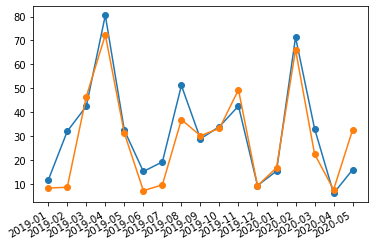

In [74]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.plot(df3['Date'], df3['y test'], 'o-')
ax.plot(df3['Date'], df3['y pred'], 'o-')

### So from the prediction, this model can be well used in predicting all the Material Cost items' weight from Month, Material Name, Vendor, Material Description

In [75]:
X3_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 435 to 318
Data columns (total 24 columns):
By Pull                 171 non-null float64
By Weight               171 non-null float64
By Item                 171 non-null float64
Month                   171 non-null int64
Vendor_gsi              171 non-null uint8
Vendor_wnr              171 non-null uint8
Material_escrapM        171 non-null uint8
Material_escrapH        171 non-null uint8
Material_papermix       171 non-null uint8
Material_paperboard     171 non-null uint8
Material_plastic        171 non-null uint8
Material_productcon     171 non-null uint8
Material_productlid     171 non-null uint8
Material_scrapCPU       171 non-null uint8
Material_scrapLap       171 non-null uint8
Material_ScrapMFP       171 non-null uint8
Material_solid          171 non-null uint8
Material_strap          171 non-null uint8
Material_trash15        171 non-null uint8
Material_trash2yd       171 non-null uint8
Material_trash30        171

In [76]:
d_0720_trash30rolloff = {'By Pull':[1],'By Weight':[0],'By Item':[0],'Month': [7], 
                         'Vendor_gsi':[1],'Vendor_wnr':[0],
                         'Material_escrapM':[0],'Material_escrapH':[0],'Material_papermix':[0],
                         'Material_paperboard':[0],'Material_plastic':[0],'Material_productcon':[0],
                        'Material_productlid':[0],'Material_scrapCPU':[0],'Material_scrapLap':[0],
                        'Material_ScrapMFP':[0],'Material_solid':[0],'Material_strap':[0],
                        'Material_trash15':[0],'Material_trash2yd':[0],'Material_trash30':[1],
                        'Material_trash40':[0],'Material_trashrefuse':[0],'Material_trashunload':[0]}
d_0720_trash30rolloff = pd.DataFrame(data=d_0720_trash30rolloff)

In [77]:
model3.predict(d_0720_trash30rolloff)

array([8.98793996])

In [101]:
d_0720_trash15yd = {'By Pull':[1],'By Weight':[0],'By Item':[0],'Month': [7], 
                         'Vendor_gsi':[1],'Vendor_wnr':[0],
                         'Material_escrapM':[0],'Material_escrapH':[0],'Material_papermix':[0],
                         'Material_paperboard':[0],'Material_plastic':[0],'Material_productcon':[0],
                        'Material_productlid':[0],'Material_scrapCPU':[0],'Material_scrapLap':[0],
                        'Material_ScrapMFP':[0],'Material_solid':[0],'Material_strap':[0],
                        'Material_trash15':[1],'Material_trash2yd':[0],'Material_trash30':[0],
                        'Material_trash40':[0],'Material_trashrefuse':[0],'Material_trashunload':[0]}
d_0720_trash15yd = pd.DataFrame(data=d_0720_trash15yd)

In [102]:
model3.predict(d_0720_trash15yd)

array([2.05860867])

In [103]:
d_0720_trash2yd = {'By Pull':[1],'By Weight':[0],'By Item':[0],'Month': [7], 
                         'Vendor_gsi':[1],'Vendor_wnr':[0],
                         'Material_escrapM':[0],'Material_escrapH':[0],'Material_papermix':[0],
                         'Material_paperboard':[0],'Material_plastic':[0],'Material_productcon':[0],
                        'Material_productlid':[0],'Material_scrapCPU':[0],'Material_scrapLap':[0],
                        'Material_ScrapMFP':[0],'Material_solid':[0],'Material_strap':[0],
                        'Material_trash15':[0],'Material_trash2yd':[1],'Material_trash30':[0],
                        'Material_trash40':[0],'Material_trashrefuse':[0],'Material_trashunload':[0]}
d_0720_trash2yd = pd.DataFrame(data=d_0720_trash2yd)

In [104]:
model3.predict(d_0720_trash2yd)

array([0.59188921])

In [105]:
d_0720_trash40 = {'By Pull':[1],'By Weight':[0],'By Item':[0],'Month': [7], 
                         'Vendor_gsi':[1],'Vendor_wnr':[0],
                         'Material_escrapM':[0],'Material_escrapH':[0],'Material_papermix':[0],
                         'Material_paperboard':[0],'Material_plastic':[0],'Material_productcon':[0],
                        'Material_productlid':[0],'Material_scrapCPU':[0],'Material_scrapLap':[0],
                        'Material_ScrapMFP':[0],'Material_solid':[0],'Material_strap':[0],
                        'Material_trash15':[0],'Material_trash2yd':[0],'Material_trash30':[0],
                        'Material_trash40':[1],'Material_trashrefuse':[0],'Material_trashunload':[0]}
d_0720_trash40 = pd.DataFrame(data=d_0720_trash40)

In [106]:
model3.predict(d_0720_trash40)

array([22.94391167])

In [109]:
pred_total_weight_trash_normal_0720 = model3.predict(d_0720_trash30rolloff)+model3.predict(d_0720_trash15yd)+model3.predict(d_0720_trash2yd)+model3.predict(d_0720_trash40)
pred_total_weight_trash_normal_0720


array([34.58234952])

### For example, above is the prediction weight of Trash-30 RollOff from Vendor "Gallegos Sanitation Incorporated" in July 2020, 8.98 tons
### To predict the weight of items which are generating Material Cost, we just need 1.By pull or by weight or by item; 2. Vendor name; 3.WATER material name
### In other words, I can predict each vendor's each material's weight for next month.

## Predict Additional Cost

In [78]:
df_add = df_add.drop(["Material or Addt. Fee",'Material Cost(US $)','Material Revenue (US $)','Total Cost','Cost?',
                     'Revenue?'],axis=1)

In [79]:
# encode Vendor, Vendor Description/Material, WATER Material Name or Addt. Fee Name

In [80]:
df_add = pd.get_dummies(df_add,columns = ['Vendor','WATER Material Name or Addt. Fee Name'],drop_first = True)

In [81]:
df_add = df_add.drop(["Additional Fee Cost","Additional Fee Occurencies",'Vendor Description/Material'],axis=1)

In [82]:
X4 = df_add.drop(["Additional Fee Total"],axis=1)
y4 = df_add["Additional Fee Total"]
X4 = X4.fillna(0)
y4 = y4.fillna(0)
X4_train, X4_test, y4_train, y4_test = model_selection.train_test_split(X4, y4, test_size=0.25)

In [83]:
model4 = GradientBoostingRegressor()
X4_train_new = X4_train.drop(["Date"],axis=1)
X4_test_new = X4_test.drop(["Date"],axis=1)
model4 = GradientBoostingRegressor(random_state=0)
model4.fit(X4_train_new, y4_train)
y4_pred = model4.predict(X4_test_new)
mean_squared_error(y4_test, y4_pred)

2294.941093425042

In [84]:
X4_test["y test"] = y4_test
X4_test["y pred"] = y4_pred
df4 = X4_test[["Date","y test","y pred"]].groupby(['Date'],as_index=False).sum()
df4

/Users/chang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/chang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,y test,y pred
0,2019-01,510.50,496.260671
1,2019-02,84.00,54.131986
2,2019-03,500.00,395.278622
3,2019-04,0.00,3.443143
4,2019-05,250.00,313.420226
5,2019-06,744.00,688.810139
6,2019-07,460.00,446.547508
7,2019-08,0.00,23.761090
8,2019-09,94.50,33.576695
9,2019-10,200.00,226.869308


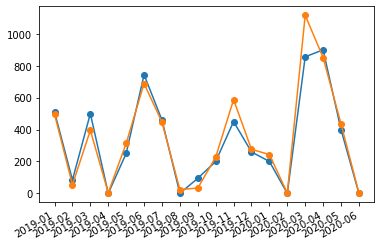

In [85]:
fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.plot(df4['Date'], df4['y test'], 'o-')
ax.plot(df4['Date'], df4['y pred'], 'o-')

### So the Additional Total Fee can be predicted Month, Weight, Vendor, Additional Fee Name.

In [86]:
X4_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 75 to 471
Data columns (total 25 columns):
Date                                                                         124 non-null object
By Pull (0 or 1)                                                             124 non-null float64
By Weight (0 or 1)                                                           124 non-null float64
By Item (0 or 1)                                                             124 non-null float64
Weight                                                                       124 non-null float64
Month                                                                        124 non-null int64
Vendor_Gallegos Sanitation Incorporated - Fort Collins, Colorado 80522       124 non-null uint8
Vendor_Waste-Not Recycling - Johnstown, Colorado 80534                       124 non-null uint8
WATER Material Name or Addt. Fee Name_Container/Bin Rental Fees              124 non-null uint8
WATER Material Name o

In [87]:
d_0720_environment = {'By Pull':[0],'By Weight':[0],'By Item':[0],'Weight':[0],'Month': [7], 
                    'Vendor_Gallegos Sanitation Incorporated - Fort Collins, Colorado 80522':[1],
                    'Vendor_Waste-Not Recycling - Johnstown, Colorado 80534 ':[0],
                    'WATER Material Name or Addt. Fee Name_Container/Bin Rental Fees':[0],
                    'WATER Material Name or Addt. Fee Name_Environmental/Regulatory Fees':[1],
                    'WATER Material Name or Addt. Fee Name_Escrap Motors':[0],
                    'ATER Material Name or Addt. Fee Name_Freight/Pick-up/Hauling Fees':[0],
                    'WATER Material Name or Addt. Fee Name_Fuel Fees':[0],
                    'WATER Material Name or Addt. Fee Name_Late Fees':[0],
                    'WATER Material Name or Addt. Fee Name_Other Fees':[0],
                    'WATER Material Name or Addt. Fee Name_Paper - Cardboard':[0],
                    'WATER Material Name or Addt. Fee Name_Plastic - Film LDPE Clear':[0],
                    'WATER Material Name or Addt. Fee Name_Plastic - Film Mixed Film':[0],
                    'WATER Material Name or Addt. Fee Name_Plastic - Mixed Plastic':[0],
                    'WATER Material Name or Addt. Fee Name_Plastic - PET Green Strapping':[0],
                    'WATER Material Name or Addt. Fee Name_Plastic - Polypropylene Containers':[0],
                    'WATER Material Name or Addt. Fee Name_Plastic - Polypropylene Super Sacks':[0],
                    'WATER Material Name or Addt. Fee Name_Round off amount':[1],
                    'WATER Material Name or Addt. Fee Name_Scrap Metal - Ferrous':[0],
                    'WATER Material Name or Addt. Fee Name_Wire #2 Copper Insulated':[0]}
d_0720_environment = pd.DataFrame(data=d_0720_environment)

In [111]:
model4.predict(d_0720_environment)

array([4.5699517])

### For example above, the predicted Environmental/Regulation fee for vendor "GSI" in July 2020 is 51.4284 dollars
### In other words, any additional fee item amount in any month can be predicted.

# Visualization of history data

In [89]:
df_wr = df0.loc[df0['Vendor']=="Waste-Not Recycling - Johnstown, Colorado 80534"]
df_gsi = df0.loc[df0['Vendor']=="Gallegos Sanitation Incorporated - Fort Collins, Colorado 80522"]
df_a1 = df0.loc[df0['Vendor']=="A1 Organics - Eaton, Colorado 80615"]

In [91]:
df_gsi_mr = df_gsi.loc[~df_gsi['Revenue?'].isna()]
df_gsi_mc = df_gsi.loc[~df_gsi['Cost?'].isna()]
df_gsi_add = df_gsi.loc[df_gsi['Cost?'].isna() & df_gsi['Revenue?'].isna()]

In [96]:
df_gsi_mc = df_gsi_mc[['Date','Weight','Material Cost(US $)']].groupby(['Date'],as_index=False).sum()

In [97]:
df_gsi_mc

,Date,Weight,Material Cost(US $)
0,2019-01,55.15000,5357.60
1,2019-02,74.95000,8256.75
2,2019-03,51.22200,4632.00
3,2019-04,41.46200,3909.75
4,2019-05,45.01200,4276.75
5,2019-06,44.21700,4436.00
6,2019-07,43.18200,4231.00
7,2019-08,44.08300,4478.00
8,2019-09,43.18200,4231.00
9,2019-10,42.76800,4231.00


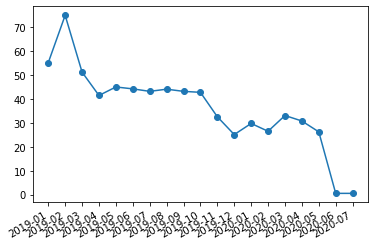

In [98]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.plot(df_gsi_mc['Date'], df_gsi_mc['Weight'], 'o-')